In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/Users/aarushinishantsingh/Downloads/cardio_train.csv", sep = ";")

In [9]:
df.shape

(70000, 13)

In [11]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [13]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
df.duplicated().sum()

0

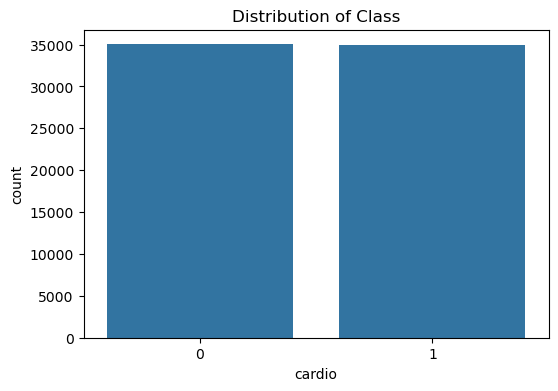

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cardio')
plt.title('Distribution of Class')
plt.show()

In [19]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('cardio', axis=1)
y = df_encoded['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[5325 1663]
 [2119 4893]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [27]:

model = SVC(kernel="linear", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVC (Linear Kernel) Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVC (Linear Kernel) Results
[[5668 1320]
 [2510 4502]]
              precision    recall  f1-score   support

           0       0.69      0.81      0.75      6988
           1       0.77      0.64      0.70      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.72     14000
weighted avg       0.73      0.73      0.72     14000



In [28]:
model = SVC(kernel = "poly",  degree=3, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73      6988
           1       0.76      0.57      0.65      7012

    accuracy                           0.70     14000
   macro avg       0.71      0.70      0.69     14000
weighted avg       0.71      0.70      0.69     14000



In [50]:
model = SVC(kernel="rbf", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVC (RBF Kernel) Results")
print(classification_report(y_test, y_pred))

SVC (RBF Kernel) Results
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [52]:
model = SVC(kernel="sigmoid", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("SVC (Sigmoid Kernel) Results")
print(classification_report(y_test, y_pred))

SVC (Sigmoid Kernel) Results
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      6988
           1       0.57      0.57      0.57      7012

    accuracy                           0.57     14000
   macro avg       0.57      0.57      0.57     14000
weighted avg       0.57      0.57      0.57     14000



In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


knn_model = KNeighborsClassifier(n_neighbors=9) 
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
recall = recall_score(y_test, y_pred, zero_division=1)
f1 = f1_score(y_test, y_pred, zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.6376
Precision: 0.6426
Recall: 0.6229
F1-score: 0.6326


In [57]:
acc_scores = []
k_values = range(1, 21) 

for k in k_values:
  if k % 2 != 0 :
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc_scores.append(accuracy)

print("Accuracy for different k values:", acc_scores)



Accuracy for different k values: [0.5942857142857143, 0.6132142857142857, 0.6278571428571429, 0.6298571428571429, 0.6376428571428572, 0.6385714285714286, 0.6414285714285715, 0.6433571428571428, 0.6456428571428572, 0.6481428571428571]


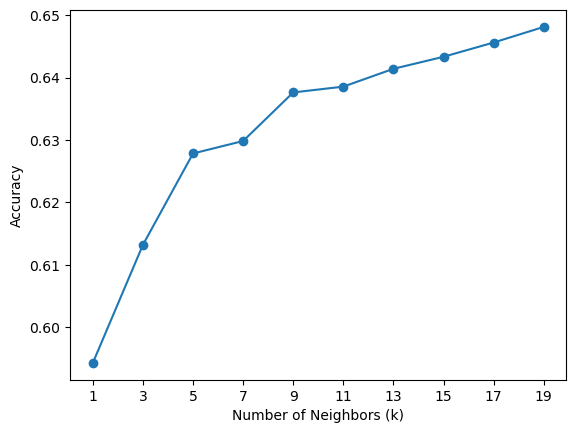

In [58]:
import matplotlib.pyplot as plt

k_values = [k for k in range(1, 21) if k % 2 != 0] 

plt.plot(k_values, acc_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [65]:
from sklearn.naive_bayes import GaussianNB

# naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("Naive Bayes Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Naive Bayes Results
[[6081  907]
 [4787 2225]]
              precision    recall  f1-score   support

           0       0.56      0.87      0.68      6988
           1       0.71      0.32      0.44      7012

    accuracy                           0.59     14000
   macro avg       0.63      0.59      0.56     14000
weighted avg       0.64      0.59      0.56     14000



In [67]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Confusion Matrix (Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix (Decision Tree):
[[4392 2596]
 [2507 4505]]

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      6988
           1       0.63      0.64      0.64      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



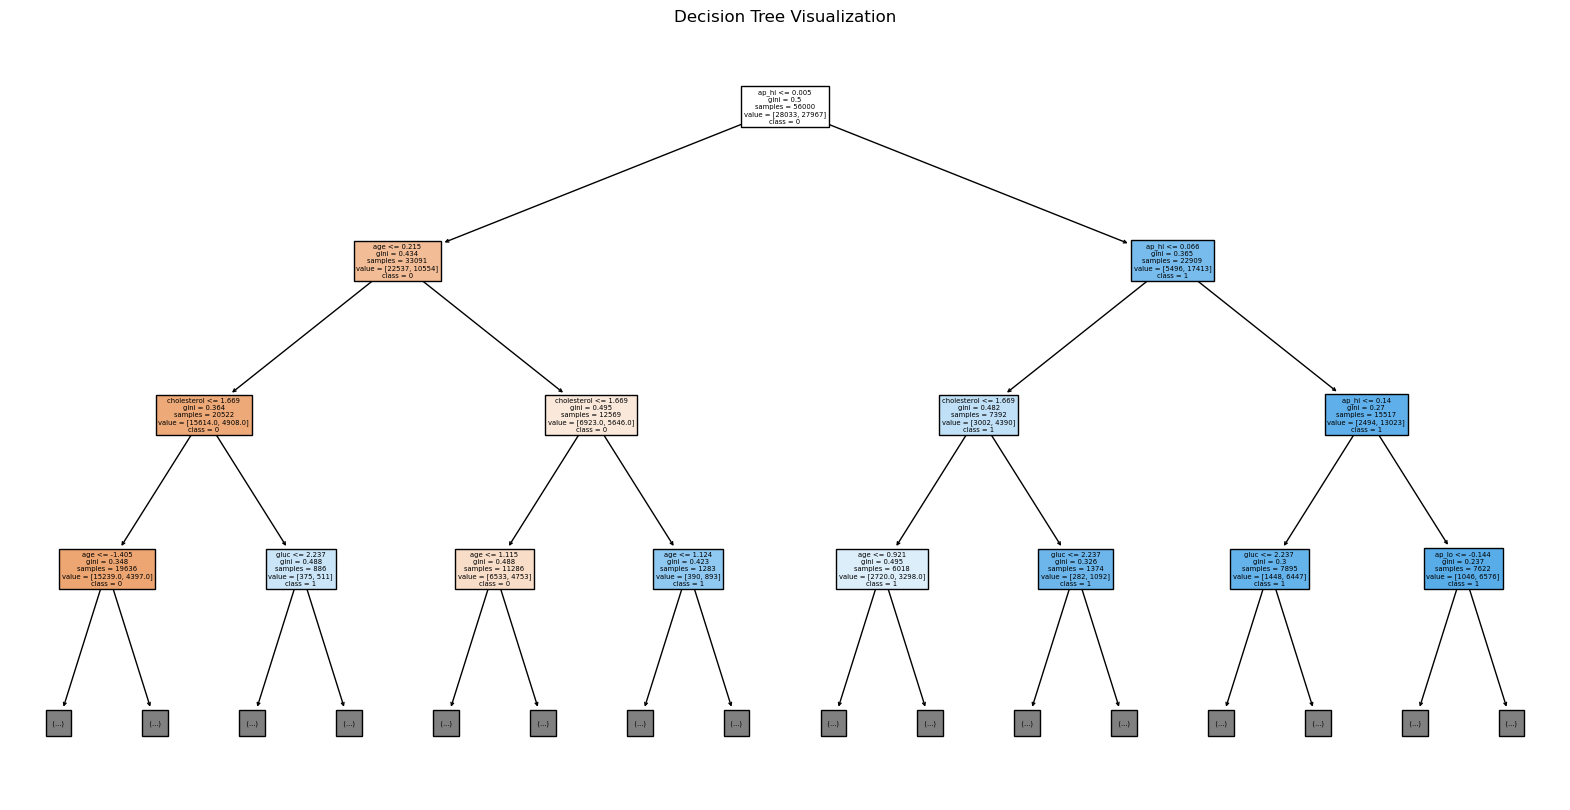

In [69]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['0', '1'], max_depth = 3)
plt.title("Decision Tree Visualization")
plt.show()

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Results
[[5259 1729]
 [2101 4911]]
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    "SVC (Linear)": SVC(kernel="linear", random_state=42),
    "SVC (Poly)": SVC(kernel="poly", degree=3, random_state=42),
    "SVC (RBF)": SVC(kernel="rbf", random_state=42),
    "SVC (Sigmoid)": SVC(kernel="sigmoid", random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN (k=9)": KNeighborsClassifier(n_neighbors=9),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}
results = {}


In [101]:
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    p = precision_score(y_test, y_pred)
    r = recall_score(y_test, y_pred)
    
    results[name] = {
        "accuracy": acc,
        "f1_score": f1,
        "precision": p,
        "recall": r
    }
    
    

In [ ]:
import matplotlib.pyplot as plt


model_names = list(results.keys())
accuracies = [metrics["accuracy"] for metrics in results.values()]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies)

plt.title("Comparison of Accuracies Across Kernels")
plt.xlabel("Kernel / Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # accuracies are between 0 and 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [102]:
print("Model Accuracies:")
for name, acc in results.items():
    print(f"{name:20} : {acc:.3f} : {f:.3f} : {p:.3f} : {r:.3f}")

Model Accuracies:
SVC (Linear)         : 0.726
SVC (Poly)           : 0.696
SVC (RBF)            : 0.730
SVC (Sigmoid)        : 0.568
Decision Tree        : 0.635
KNN (k=9)            : 0.638
Random Forest        : 0.726
Naive Bayes          : 0.593
